In [21]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs  # 
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle
from glob import glob
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime as dt

# U Component of Wind

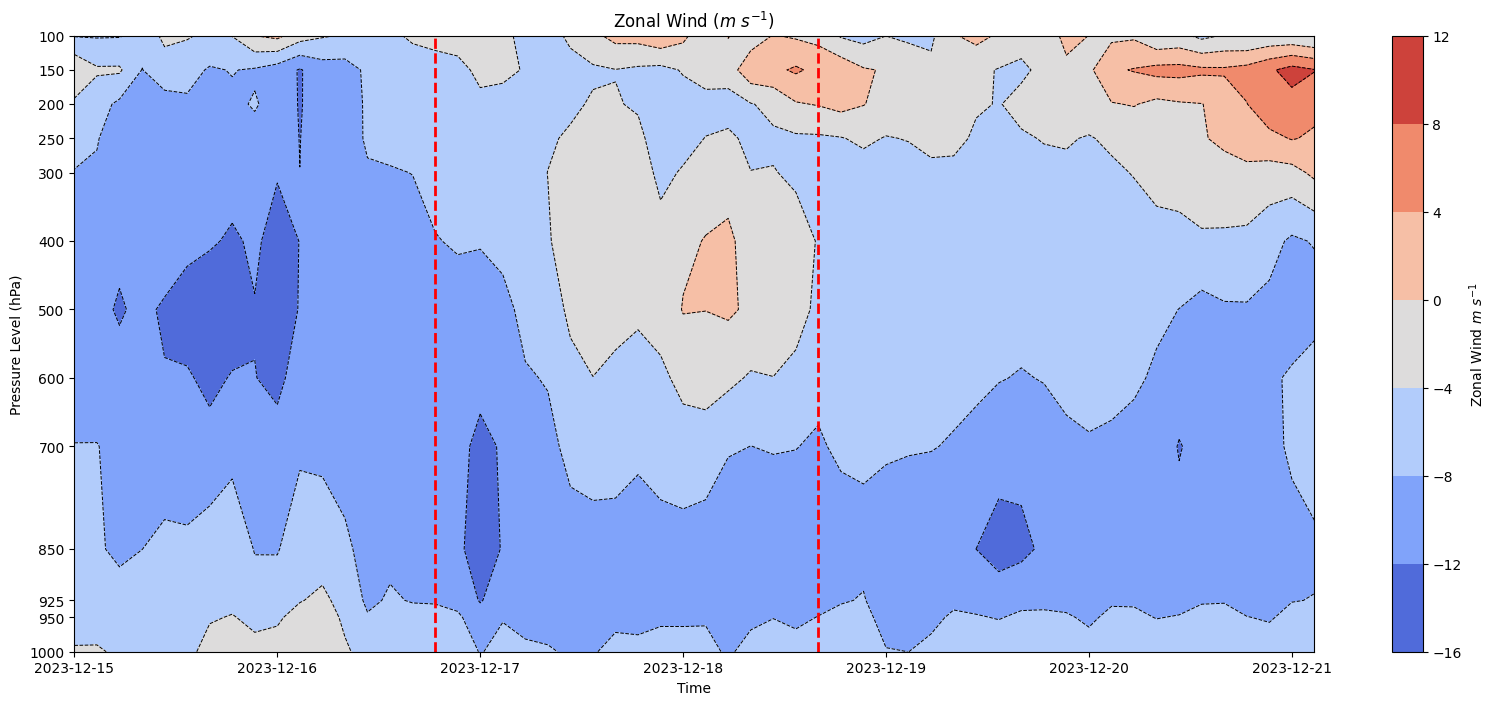

In [ ]:
j=16;height=500
data=xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/IMDAA/U/ncum_imdaa_reanl_HR_UGRD-prl_2023121500-2023122121.nc")
# Choose the time of interest
lat_min, lat_max = 8, 9  # Replace with your desired latitude range
lon_min, lon_max = 78, 79  # Replace with your desired longitude range
data = data.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))


# Convert the time to datetime format
data['time'] = pd.to_datetime(data['time'].values)

anomaly_precp1=data['UGRD_prl'].mean(dim=['latitude', 'longitude'])

# Only keep data above 100 hPa=
anomaly_precp1 = anomaly_precp1.where(anomaly_precp1['plevel'] <= 1000, drop=True)
# Only keep data above 100 hPa=
anomaly_precp1 = anomaly_precp1.where(anomaly_precp1['plevel'] >= 100, drop=True)
# Extract levels and time
levels = anomaly_precp1['plevel']
time = anomaly_precp1['time']
anomaly_precp1=anomaly_precp1.interpolate_na(method="nearest",dim='time')

# Plot the area-averaged pressure vs. time vertical distribution
fig, ax = plt.subplots(1, figsize=(20,8))
# Create a contour plot
contour = ax.contourf(time, levels, anomaly_precp1.T,levels=6, cmap='coolwarm')
ax.contour(time, levels, anomaly_precp1.T, colors='black',levels=6,  linewidths=0.7,linestyles='--')
ax.axvline(x=dt(2023,12,17,0), color='red', linewidth=2, linestyle='--')
ax.axvline(x=dt(2023,12,19,3), color='red', linewidth=2, linestyle='--')
# Add colorbar
cbar = plt.colorbar(contour, ax=ax, label='Zonal Wind $m~s^{-1}$')

# Set axis labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Pressure Level (hPa)")
plt.title('Zonal Wind $(m~s^{-1})$')

# Set x and y ticks for readability
ax.set_xticks(time[::9])  # Show every 4th time step (adjust as necessary)
ax.set_yticks(levels)

# Rotate x-tick labels for better readability
plt.xticks(rotation=0)

# Invert y-axis for pressure levels
plt.gca().invert_yaxis()

plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/ZW_area_averaged.png",dpi=300,bbox_inches='tight')



# V Component of Wind

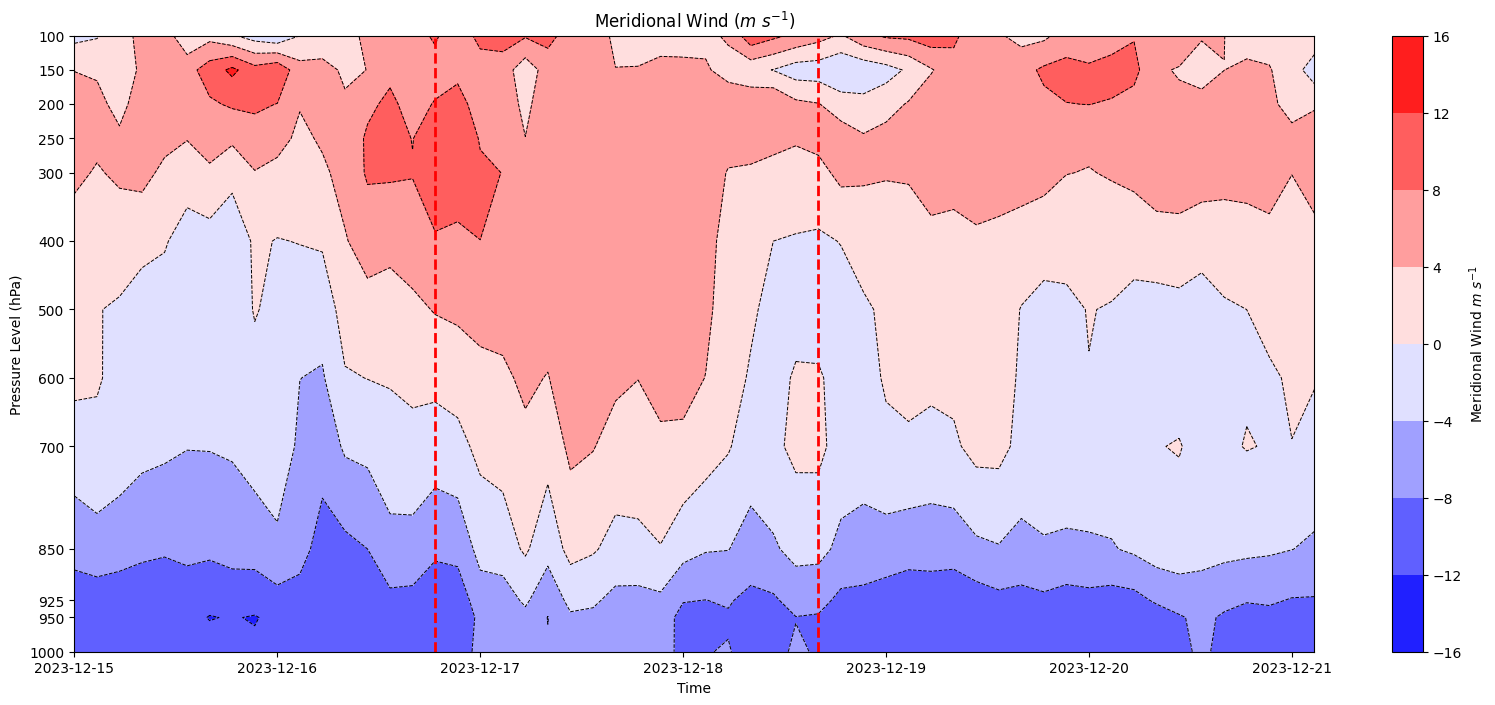

In [31]:
j=16;height=500
data=xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/IMDAA/V/ncum_imdaa_reanl_HR_VGRD-prl_2023121500-2023122121.nc")
# Choose the time of interest
lat_min, lat_max = 8, 9  # Replace with your desired latitude range
lon_min, lon_max = 78, 79  # Replace with your desired longitude range
data = data.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))


# Convert the time to datetime format
data['time'] = pd.to_datetime(data['time'].values)

anomaly_precp1=data['VGRD_prl'].mean(dim=['latitude', 'longitude'])

# Only keep data above 100 hPa=
anomaly_precp1 = anomaly_precp1.where(anomaly_precp1['plevel'] <= 1000, drop=True)
# Only keep data above 100 hPa=
anomaly_precp1 = anomaly_precp1.where(anomaly_precp1['plevel'] >= 100, drop=True)
# Extract levels and time
levels = anomaly_precp1['plevel']
time = anomaly_precp1['time']
anomaly_precp1=anomaly_precp1.interpolate_na(method="nearest",dim='time')
# Plot the area-averaged pressure vs. time vertical distribution
fig, ax = plt.subplots(1, figsize=(20,8))

# Create a contour plot
contour = ax.contourf(time, levels, anomaly_precp1.T, cmap='bwr')
ax.contour(time, levels, anomaly_precp1.T, colors='black',  linewidths=0.7,linestyles='--')
ax.axvline(x=dt(2023,12,17,0), color='red', linewidth=2, linestyle='--')
ax.axvline(x=dt(2023,12,19,3), color='red', linewidth=2, linestyle='--')
# Add colorbar
cbar = plt.colorbar(contour, ax=ax, label='Meridional Wind $m~s^{-1}$')

# Set axis labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Pressure Level (hPa)")
plt.title('Meridional Wind $(m~s^{-1})$')

# Set x and y ticks for readability
ax.set_xticks(time[::9])  # Show every 4th time step (adjust as necessary)
ax.set_yticks(levels)

# Rotate x-tick labels for better readability
plt.xticks(rotation=0)

# Invert y-axis for pressure levels
plt.gca().invert_yaxis()

plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/MW_area_averaged.png",dpi=500,bbox_inches='tight')


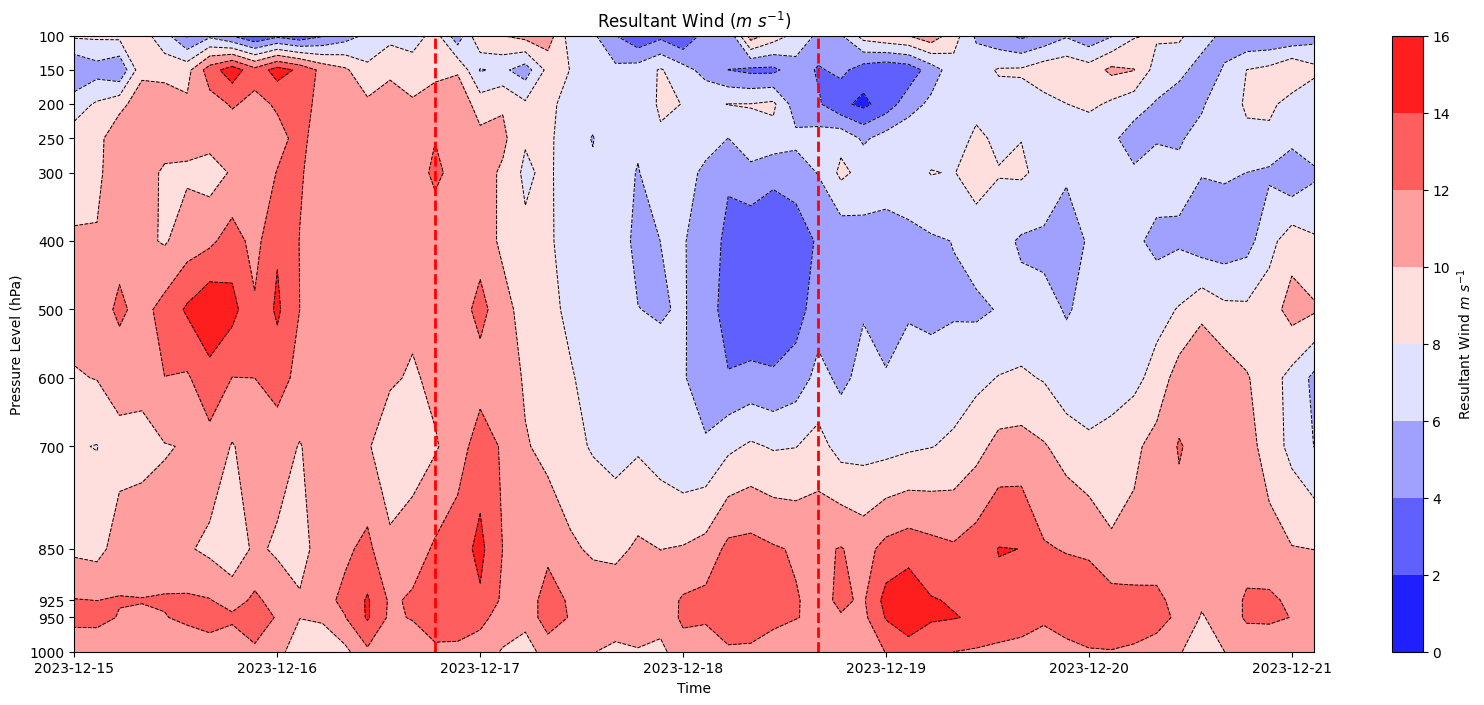

In [44]:
data=xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/IMDAA/U/ncum_imdaa_reanl_HR_UGRD-prl_2023121500-2023122121.nc")
# Choose the time of interest
lat_min, lat_max = 8, 9  # Replace with your desired latitude range
lon_min, lon_max = 78, 79  # Replace with your desired longitude range
data = data.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

data1=xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/IMDAA/V/ncum_imdaa_reanl_HR_VGRD-prl_2023121500-2023122121.nc")

data1 = data1.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

# Convert the time to datetime format
data['time'] = pd.to_datetime(data['time'].values)
data1['time'] = pd.to_datetime(data1['time'].values)

anomaly_u=data['UGRD_prl']
anomaly_v=data1['VGRD_prl']

# Calculate the resultant wind speed
wind_speed = np.sqrt(anomaly_u**2 + anomaly_v**2)


# Calculate the area average over the latitude and longitude dimensions
anomaly_precp1 = wind_speed.mean(dim=['latitude', 'longitude'])

anomaly_precp1 = anomaly_precp1.where((anomaly_precp1['plevel'] <= 1000) & (anomaly_precp1['plevel'] >= 100), drop=True)
levels1 = anomaly_precp1['plevel']
time1 = anomaly_precp1['time']
anomaly_precp1=anomaly_precp1.interpolate_na(method="nearest",dim='time')
# Plot the area-averaged pressure vs. time vertical distribution
fig, ax = plt.subplots(1, figsize=(20,8))

# Create a contour plot
contour = ax.contourf(time, levels, anomaly_precp1.T, cmap='bwr')
ax.contour(time, levels, anomaly_precp1.T, colors='black',  linewidths=0.7,linestyles='--')
ax.axvline(x=dt(2023,12,17,0), color='red', linewidth=2, linestyle='--')
ax.axvline(x=dt(2023,12,19,3), color='red', linewidth=2, linestyle='--')
# Add colorbar
cbar = plt.colorbar(contour, ax=ax, label='Resultant Wind $m~s^{-1}$')

# Set axis labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Pressure Level (hPa)")
plt.title('Resultant Wind $(m~s^{-1})$')

# Set x and y ticks for readability
ax.set_xticks(time[::9])  # Show every 4th time step (adjust as necessary)
ax.set_yticks(levels)

# Rotate x-tick labels for better readability
plt.xticks(rotation=0)

# Invert y-axis for pressure levels
plt.gca().invert_yaxis()

plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/RW_area_averaged.png",dpi=300,bbox_inches='tight')


# Vertical Velocity

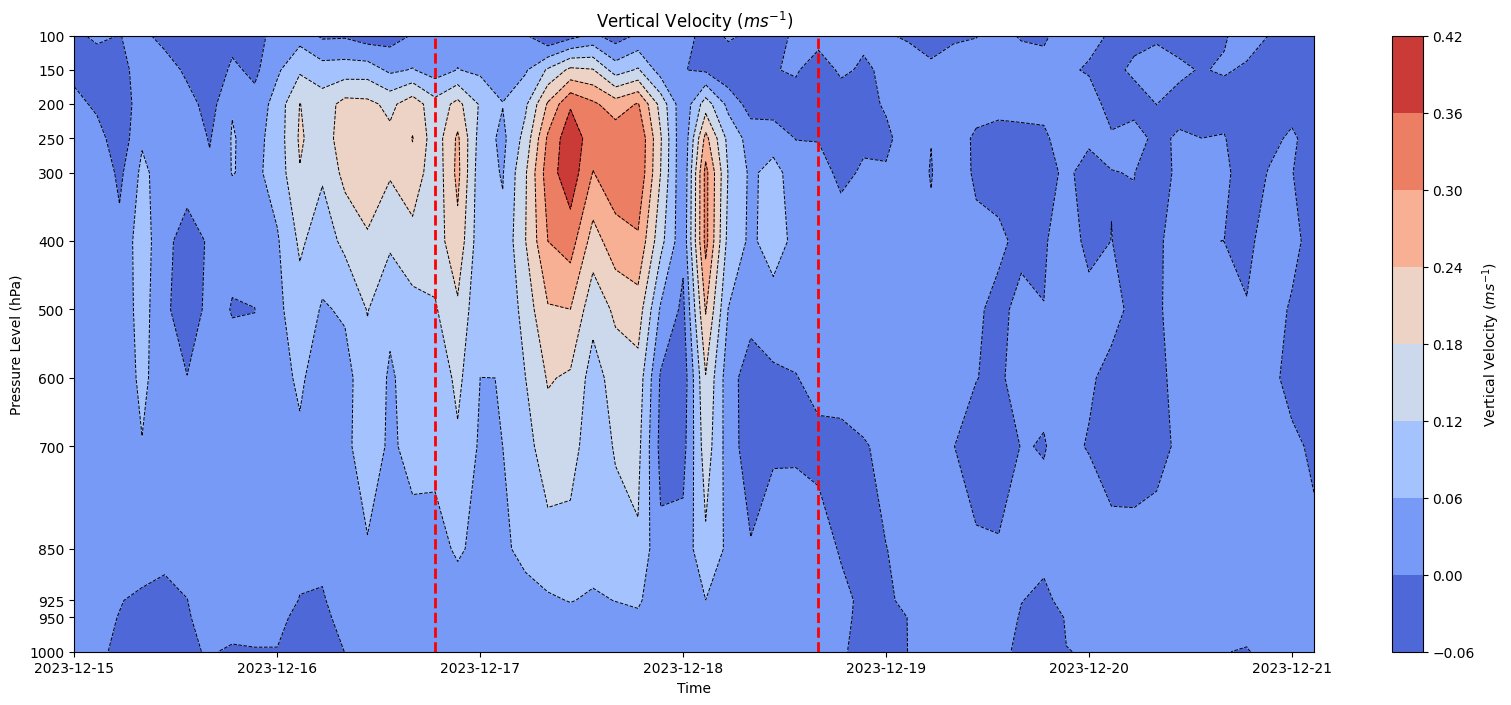

In [42]:

data = xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Identification/decEPE/IMDAA/data/VV/ncum_imdaa_reanl_HR_DZDT-prl_2023121500-2023122121.nc")
# Choose the time of interest
lat_min, lat_max = 8, 9  # Replace with your desired latitude range
lon_min, lon_max = 78, 79  # Replace with your desired longitude range
data = data.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))


# Convert the time to datetime format
data['time'] = pd.to_datetime(data['time'].values)

anomaly_precp1=data['DZDT_prl'].mean(dim=['latitude', 'longitude'])

anomaly_precp1 = anomaly_precp1.where((anomaly_precp1['plevel'] <= 1000) & (anomaly_precp1['plevel'] >= 100), drop=True)
levels1 = anomaly_precp1['plevel']
time1 = anomaly_precp1['time']

# Plot the area-averaged pressure vs. time vertical distribution
fig, ax = plt.subplots(1, figsize=(20,8))

# Create a contour plot
contour = ax.contourf(time, levels1, anomaly_precp1.T, cmap='coolwarm')
ax.contour(time, levels1, anomaly_precp1.T, colors='black',  linewidths=0.7,linestyles='--')
ax.axvline(x=dt(2023,12,17,0), color='red', linewidth=2, linestyle='--')
ax.axvline(x=dt(2023,12,19,3), color='red', linewidth=2, linestyle='--')
# Add colorbar
cbar = plt.colorbar(contour, ax=ax, label='Vertical Velocity $(m s^{-1})$')

# Set axis labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Pressure Level (hPa)")
plt.title('Vertical Velocity $(m s^{-1})$')

# Set x and y ticks for readability
ax.set_xticks(time[::9])  # Show every 4th time step (adjust as necessary)
ax.set_yticks(levels1)

# Rotate x-tick labels for better readability
plt.xticks(rotation=0)

# Invert y-axis for pressure levels
plt.gca().invert_yaxis()

plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/VV_area_averaged.png",dpi=300,bbox_inches='tight')



# Divergence

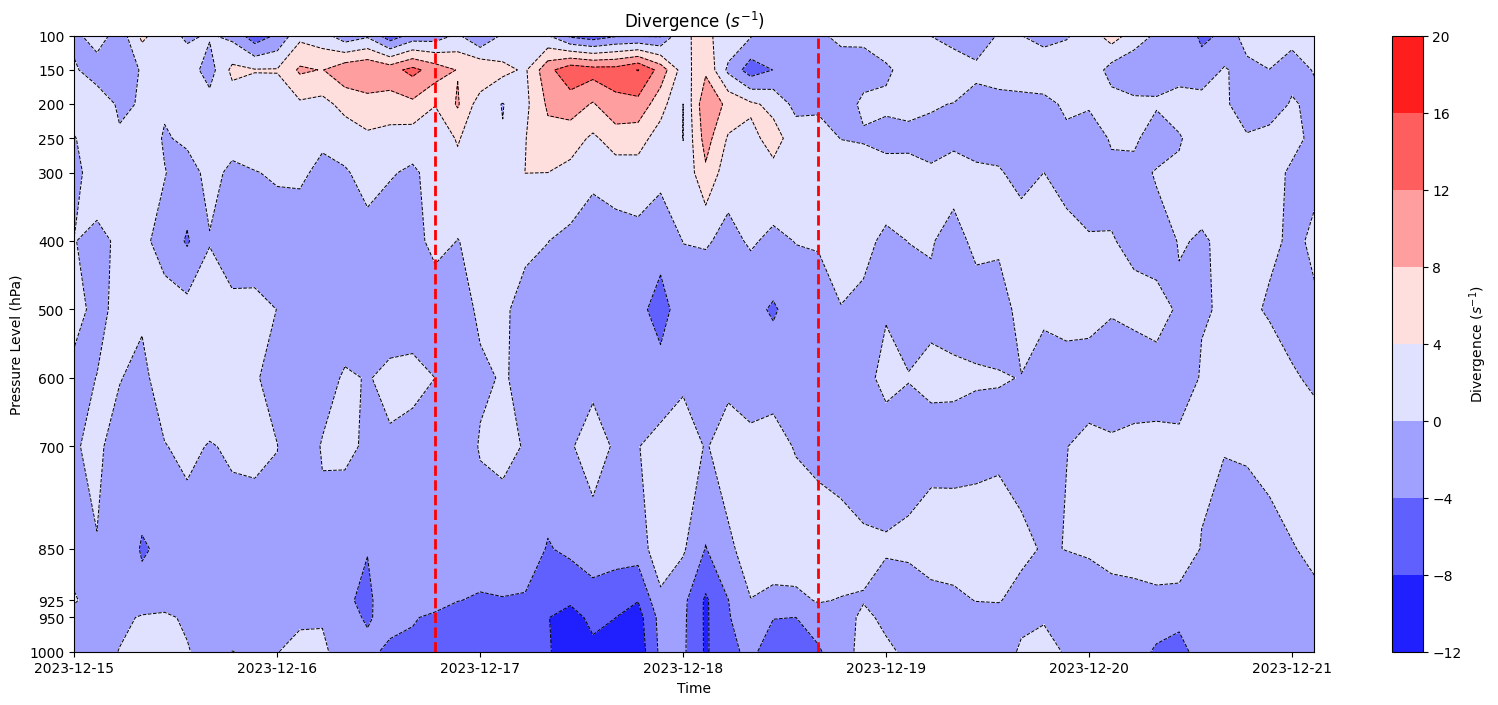

In [51]:
# File paths for u_wind and v_wind
u_wind_path = "C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/IMDAA/U/ncum_imdaa_reanl_HR_UGRD-prl_2023121500-2023122121.nc"  
v_wind_path = "C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/IMDAA/V/ncum_imdaa_reanl_HR_VGRD-prl_2023121500-2023122121.nc" 

# Load the u_wind and v_wind data from different files
u_data = xr.open_dataset(u_wind_path)
v_data = xr.open_dataset(v_wind_path)

# Restrict the latitude and longitude range (same as before)
u_data = u_data.sel(latitude=slice(5, 20), longitude=slice(60, 100))
v_data = v_data.sel(latitude=slice(5, 20), longitude=slice(60, 100))

# Convert time values to pandas datetime for easier handling
u_data['time'] = pd.to_datetime(u_data['time'].values)
v_data['time'] = pd.to_datetime(v_data['time'].values)

# Calculate divergence: (∂u/∂x + ∂v/∂y)
dx = u_data['longitude'][1] - u_data['longitude'][0]
dy = u_data['latitude'][1] - u_data['latitude'][0]

# Compute the derivatives
d_u_dx = u_data['UGRD_prl'].diff('longitude') / dx
d_v_dy = v_data['VGRD_prl'].diff('latitude') / dy

# Compute the divergence
divergence = d_u_dx + d_v_dy
divergence
# Choose the time of interest
lat_min, lat_max = 8, 9  # Replace with your desired latitude range
lon_min, lon_max = 78, 79  # Replace with your desired longitude range
data= divergence.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

# Convert the time to datetime format
data['time'] = pd.to_datetime(data['time'].values)

anomaly_precp1=data.mean(dim=['latitude', 'longitude'])

anomaly_precp1 = anomaly_precp1.where((anomaly_precp1['plevel'] <= 1000) & (anomaly_precp1['plevel'] >= 100), drop=True)
levels1 = anomaly_precp1['plevel']
time1 = anomaly_precp1['time']
anomaly_precp1=anomaly_precp1.interpolate_na(method="nearest",dim='time')
# Plot the area-averaged pressure vs. time vertical distribution
fig, ax = plt.subplots(1, figsize=(20,8))
# Create a contour plot
contour = ax.contourf(time, levels1, anomaly_precp1.T,cmap='bwr')
ax.contour(time, levels1, anomaly_precp1.T, colors='black', linewidths=0.7,linestyles='--')
ax.axvline(x=dt(2023,12,17,0), color='red', linewidth=2, linestyle='--')
ax.axvline(x=dt(2023,12,19,3), color='red', linewidth=2, linestyle='--')
# Add colorbar
cbar = plt.colorbar(contour, ax=ax, label='Divergence $(s^{-1})$')

# Set axis labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Pressure Level (hPa)")
plt.title('Divergence $(s^{-1})$')

# Set x and y ticks for readability
ax.set_xticks(time[::9])  # Show every 4th time step (adjust as necessary)
ax.set_yticks(levels1)

# Rotate x-tick labels for better readability
plt.xticks(rotation=0)

# Invert y-axis for pressure levels
plt.gca().invert_yaxis()
plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/Divergence_area_averaged.png",dpi=300,bbox_inches='tight')


# Relative Humidity

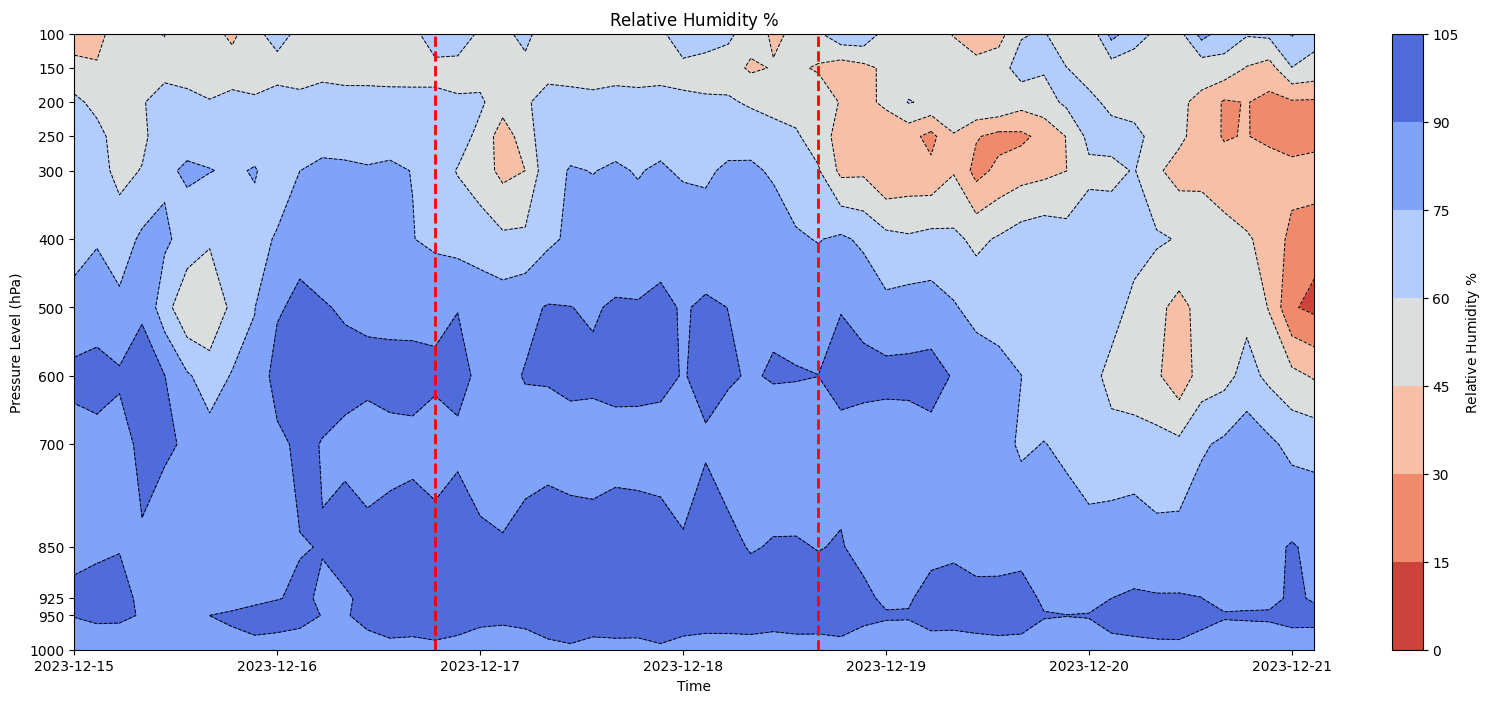

In [52]:
j=16;height=500
data=xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Identification/decEPE/IMDAA/data/rhpressurelevels.nc")
# Choose the time of interest
lat_min, lat_max = 8, 9  # Replace with your desired latitude range
lon_min, lon_max = 78, 79  # Replace with your desired longitude range
data = data.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

# Convert the time to datetime format
data['time'] = pd.to_datetime(data['time'].values)

anomaly_precp1=data['RH_prl'].mean(dim=['latitude', 'longitude'])

# Only keep data above 100 hPa=
anomaly_precp1 = anomaly_precp1.where(anomaly_precp1['plevel'] <= 1000, drop=True)
# Only keep data above 100 hPa=
anomaly_precp1 = anomaly_precp1.where(anomaly_precp1['plevel'] >= 100, drop=True)
# Extract levels and time
levels = anomaly_precp1['plevel']
time = anomaly_precp1['time']
anomaly_precp1=anomaly_precp1.interpolate_na(method="nearest",dim='time')

# Plot the area-averaged pressure vs. time vertical distribution
fig, ax = plt.subplots(1, figsize=(20,8))

# Create a contour plot
contour = ax.contourf(time, levels, anomaly_precp1.T, cmap='coolwarm_r')
ax.contour(time, levels, anomaly_precp1.T, colors='black',  linewidths=0.7,linestyles='--')
ax.axvline(x=dt(2023,12,17,0), color='red', linewidth=2, linestyle='--')
ax.axvline(x=dt(2023,12,19,3), color='red', linewidth=2, linestyle='--')
# Add colorbar
cbar = plt.colorbar(contour, ax=ax, label='Relative Humidity $\%$')

# Set axis labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Pressure Level (hPa)")
plt.title('Relative Humidity $\%$')

# Set x and y ticks for readability
ax.set_xticks(time[::9])  # Show every 4th time step (adjust as necessary)
ax.set_yticks(levels)

# Rotate x-tick labels for better readability
plt.xticks(rotation=0)

# Invert y-axis for pressure levels
plt.gca().invert_yaxis()

plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/RH_area_averaged.png",dpi=300,bbox_inches='tight')



# CAPE

In [54]:
from metpy.calc import cape_cin, parcel_profile,dewpoint_from_relative_humidity
from metpy.units import units
import metpy
from metpy.calc import surface_based_cape_cin

In [55]:

data=xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/IMDAA/rhpressurelevels.nc")
# Choose the time of interest
lat_min, lat_max = 8, 9  # Replace with your desired latitude range
lon_min, lon_max = 78, 79  # Replace with your desired longitude range
data = data.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

# Convert the time to datetime format
data['time'] = pd.to_datetime(data['time'].values)

RH=data['RH_prl'].mean(dim=['latitude', 'longitude'])
# Only keep data above 100 hPa=
RH = RH.where(RH['plevel'] <= 1000, drop=True)
# Only keep data above 100 hPa=
RH = RH.where(RH['plevel'] >= 100, drop=True)


data = xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/IMDAA/TEMP/ncum_imdaa_reanl_HR_TMP-prl_2023121500-2023122121.nc")
data = data.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
# Convert the time to datetime format
data['time'] = pd.to_datetime(data['time'].values)

TEMP=data['TMP_prl'].mean(dim=['latitude', 'longitude'])
# Only keep data above 100 hPa=
TEMP = TEMP.where(TEMP['plevel'] <= 1000, drop=True)
# Only keep data above 100 hPa=
TEMP = TEMP.where(TEMP['plevel'] >= 100, drop=True)
# Extract levels and time

In [56]:
# Calculate CAPE and CIN using Surface based on the given data
cape_aa=[];cin_aa=[]
for i in range(0,len(TEMP)):  
    # temperature data
    temp=TEMP.isel(time=i)*units.kelvin
    temp=temp.metpy.convert_units('degC')
    # relative humidity data
    rh=RH.isel(time=i).values*units.percent
    # dew Point evalulation
    dewpoint=dewpoint_from_relative_humidity(temp,rh)
    # the different pressure levels
    pressure=levels.values.tolist()*units.hPa
    cape,cin=surface_based_cape_cin(pressure=pressure[::-1],temperature=temp[::-1],dewpoint=dewpoint[::-1])
    cape_aa.append(cape.round(3).magnitude)
    cin_aa.append(cin.round(3).magnitude)


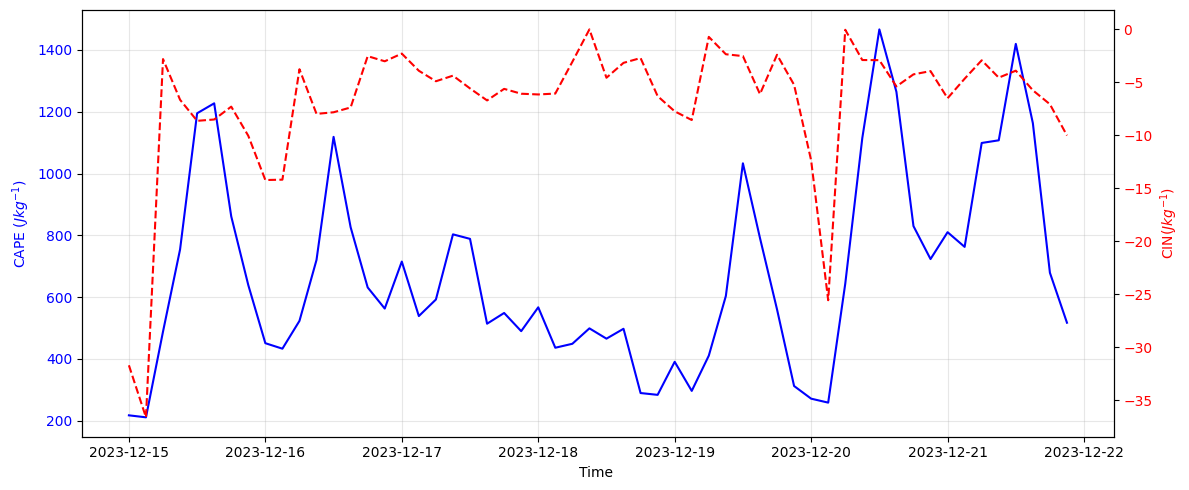

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = TEMP['time']
y1 = cape_aa  # Data for the left y-axis
y2 = cin_aa  # Data for the right y-axis

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot data on the left y-axis
ax1.plot(x, y1, color='blue', label='CAPE')
ax1.set_xlabel('Time ')
ax1.set_ylabel('CAPE $(J kg^{-1})$', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, color='red', linestyle='--', label='CIN')
ax2.set_ylabel('CIN$ (J kg^{-1})$', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add grid and legend
ax1.grid(True, linestyle='-', alpha=0.3)
plt.tight_layout()
# Show the plot
plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/CAPE_CIN_Surface.png",dpi=300,bbox_inches='tight')
